# Problem Statement

**Chennai House Prediction Problem**

ChennaiEstate is a real estate firm based in Chennai that is involved in the property business for the past 5 years. Since, they are in the business for so long, they have enough data of all the real estate transactions in the city.
They decided to venture into Analytics and have now started a division called “Chennai Estate Analytics” to give consumers as much information as possible about housings and the real estate market in Chennai. A home is often the largest and most expensive purchase a person makes in his or her lifetime. Ensuring real-estate owners have a trusted way to monitor the asset is incredibly important. Hence, they have hired you as a consultant to help them give insights and develop a model to accurately predict real estate prices.
Based on the train dataset, you will need to develop a model that accurately predicts the real estate price in Chennai.

### Data Description

## House Features
   - INT_SQFT – The interior Sq. Ft of the property
   - N_BEDROOM – The number of Bed rooms
   - N_BATHROOM - The number of bathrooms
   - N_ROOM – Total Number of Rooms
   - QS_ROOMS – The quality score assigned for rooms based on buyer reviews
   - QS_BATHROOM – The quality score assigned for bathroom based on buyer reviews
   - QS_BEDROOM – The quality score assigned for bedroom based on buyer reviews
   - QS_OVERALL – The Overall quality score assigned for the property
   - SALE_COND – The Sale Condition
       - Normal: Normal Sale
       - Abnorml: Abnormal Sale - trade, foreclosure, short sale
       - AdjLand: Adjoining Land Purchase
       - Family: Sale between family members
       - Partial: Home was not completed when last assessed
   - BUILDTYPE – The type of building
        - House
        - Commercial
        - Others



## Surrounding and Locality
   - AREA – The property in which the real estate is located
   - DIST_MAINROAD – The distance of the property to the main road
   - PARK_FACIL – Whether parking facility is available
   - UTILITY_AVAIL
        - AllPub: All public Utilities (E,G,W,& S)
        - NoSewr: Electricity, Gas, and Water (Septic Tank)
        - NoSeWa: Electricity and Gas Only
        - ELO: Electricity only
   - STREET
        - Gravel
        - Paved
        - No Access
   - MZZONE
        - A: Agriculture
        - C: Commercial
        - I: Industrial
        - RH: Residential High Density
        - RL: Residential Low Density
        - RM: Residential Medium Density
        

## House Sale Price
   - PRT_ID – The Property Transaction ID assigned by ChennaiEstate
   - COMMIS – The Commission paid to the agent
   - SALES_PRICE – The total sale price of the property


# The Dataset

In [1]:
#importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("sales_data.csv")
df.shape

(7109, 19)

In [3]:
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


In [4]:
df.tail(10)

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
7099,P03828,Adyar,895,197,1.0,1.0,3,AdjLand,Yes,House,NoSewr,No Access,I,3.6,4.7,4.2,4.12,7372,7371800
7100,P05438,T Nagar,1733,191,1.0,1.0,4,AbNormal,Yes,Commercial,NoSeWa,No Access,RL,3.4,3.7,2.1,2.89,312026,19501600
7101,P05042,Karapakkam,666,51,1.0,1.0,2,AdjLand,Yes,Others,ELO,Gravel,I,3.2,4.4,2.5,3.28,74541,6211750
7102,P05560,Karapakkam,701,100,1.0,1.0,2,AbNormal,No,House,NoSeWa,Gravel,RH,4.2,3.0,2.0,2.96,141088,5643500
7103,P05133,Karapakkam,1462,68,2.0,2.0,4,Family,No,Others,NoSeWa,Gravel,RM,2.7,3.3,3.6,3.24,178358,9387250
7104,P03834,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.52,107060,5353000
7105,P10000,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.92,205551,10818480
7106,P09594,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.84,167028,8351410
7107,P06508,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.16,119098,8507000
7108,P09794,Velachery,1896,156,3.0,2.0,5,Partial,Yes,Others,ELO,Paved,I,3.1,3.5,4.3,3.64,79812,9976480


# Data Exploration

In [5]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,495405.000000,2.366734e+07


- The describe() works only for continuous variables

In [6]:
df.isnull()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7105,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7106,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7107,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

In [8]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [9]:
#adding few coluums to a dataframe

temp = pd.DataFrame(index = df.columns)
temp['DATA_TYPE'] = df.dtypes
temp['NULL_COUNT'] = df.isnull().sum()
temp['UNIQUE_COUNT'] = df.nunique()

In [10]:
temp

,DATA_TYPE,NULL_COUNT,UNIQUE_COUNT
PRT_ID,object,0,7109
AREA,object,0,17
INT_SQFT,int64,0,1699
DIST_MAINROAD,int64,0,201
N_BEDROOM,float64,1,4
N_BATHROOM,float64,5,2
N_ROOM,int64,0,5
SALE_COND,object,0,9
PARK_FACIL,object,0,3
BUILDTYPE,object,0,5


# Univariate Analysis

Text(0.5, 0, 'Sales')

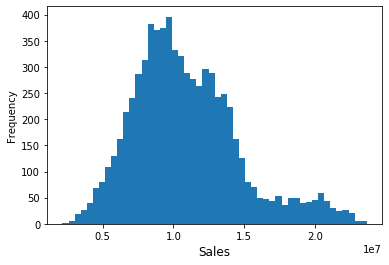

In [11]:
#Histogram

df['SALES_PRICE'].plot.hist(bins = 50)
plt.xlabel('Sales', fontsize = 12)

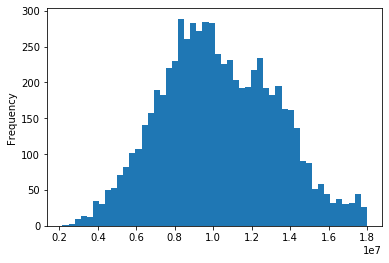

In [12]:
#removing right skewdness

(df['SALES_PRICE'].loc[df['SALES_PRICE'] < 18000000]).plot.hist(bins = 50)

Text(0.5, 0, 'Area in sq feet')

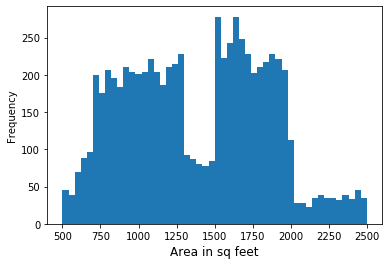

In [13]:
df['INT_SQFT'].plot.hist(bins = 50)
plt.xlabel('Area in sq feet', fontsize = 12)

Text(0.5, 0, 'Quality Score')

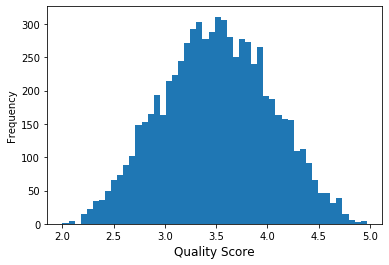

In [14]:
df['QS_OVERALL'].plot.hist(bins = 50)
plt.xlabel('Quality Score', fontsize = 12)

In [15]:
#Value Counts

df['N_BEDROOM'].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [16]:
df['N_BEDROOM'].value_counts() / len(df) * 100

1.0    53.383036
2.0    33.084822
3.0     9.945140
4.0     3.572936
Name: N_BEDROOM, dtype: float64

In [17]:
df['N_BATHROOM'].value_counts()

1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

In [18]:
df['N_BATHROOM'].value_counts() / len(df) * 100

1.0    78.618652
2.0    21.311014
Name: N_BATHROOM, dtype: float64

In [19]:
df['N_ROOM'].value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

In [20]:
df['N_ROOM'].value_counts() / len(df) * 100

4    36.052891
3    29.891687
5    17.527078
2    12.955409
6     3.572936
Name: N_ROOM, dtype: float64

Text(0.5, 0, 'No. of Bedrooms')

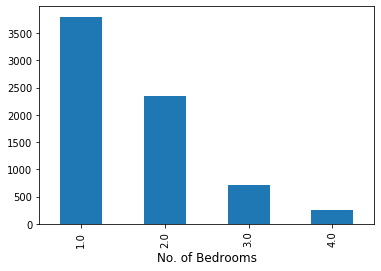

In [21]:
#Bar Plot

df['N_BEDROOM'].value_counts().plot(kind = 'bar')
plt.xlabel('No. of Bedrooms', fontsize = 12)

Text(0.5, 0, 'No. of Bathrooms')

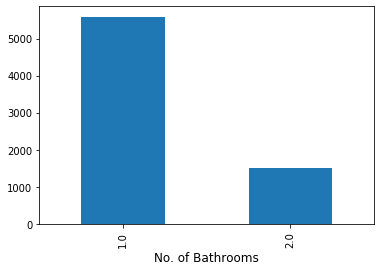

In [22]:
df['N_BATHROOM'].value_counts().plot(kind = 'bar')
plt.xlabel('No. of Bathrooms', fontsize = 12)

Text(0.5, 0, 'No. of Rooms')

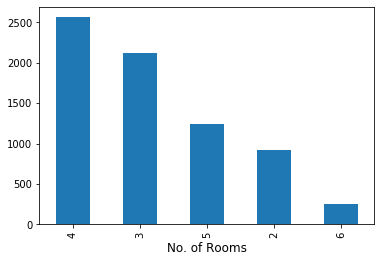

In [23]:
df['N_ROOM'].value_counts().plot(kind = 'bar')
plt.xlabel('No. of Rooms', fontsize = 12)

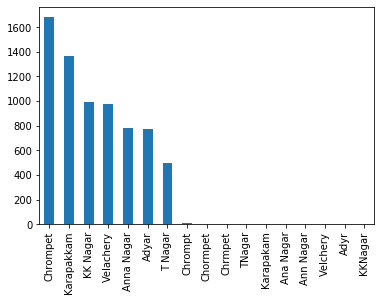

In [24]:
df['AREA'].value_counts().plot(kind = 'bar')

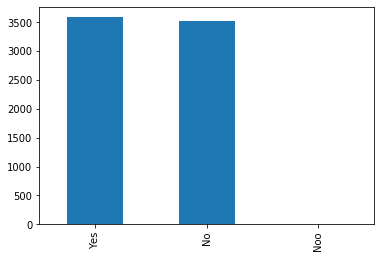

In [25]:
df['PARK_FACIL'].value_counts().plot(kind = 'bar')

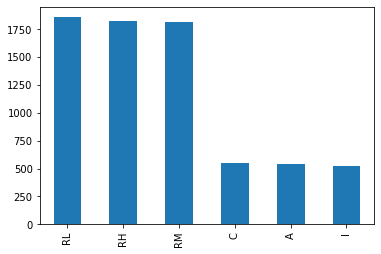

In [26]:
df['MZZONE'].value_counts().plot(kind = 'bar')

# Data Manipulation

1. Drop Duplicates (if any)
2. Fill the missing values
3. Correct the data types 
4. Fix the spelling errors in variables

In [27]:
#dropping duplicate rows

df.drop_duplicates()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,107060,5353000
7105,P10000,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,205551,10818480
7106,P09594,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,167028,8351410
7107,P06508,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,119098,8507000


In [28]:
df.shape

(7109, 19)

In [29]:
#filling missing values

df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

In [30]:
df['N_BEDROOM'].mode()

0    1.0
dtype: float64

In [31]:
df['N_BEDROOM'].fillna(value = (df['N_BEDROOM'].mode()[0]), inplace = True)

In [32]:
for i in range(0, len(df)):
    if pd.isnull(df['N_BATHROOM'][i]) == True:
        if (df['N_BATHROOM'][i] == 1.0):
            df['N_BATHROOM'][i] = 1.0
        else:
            df['N_BATHROOM'][i] = 2.0

In [33]:
def fill_na(x):
    return ((x['QS_ROOMS'] + x['QS_BATHROOM'] + x['QS_BEDROOM']) / 3)

In [34]:
df['QS_OVERALL'] = df.apply(lambda x:fill_na(x) if pd.isnull(x['QS_OVERALL']) else x['QS_OVERALL'], axis = 1)

In [35]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [36]:
#correcting the data types

df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [37]:
df = df.astype({'N_BEDROOM': 'int64', 'N_ROOM': 'int64', 'N_BATHROOM': 'int64'})

In [38]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM          int64
N_BATHROOM         int64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [39]:
df = df.astype({'N_BEDROOM': 'object', 'N_ROOM': 'object', 'N_BATHROOM': 'object'})

In [40]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM         object
N_BATHROOM        object
N_ROOM            object
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

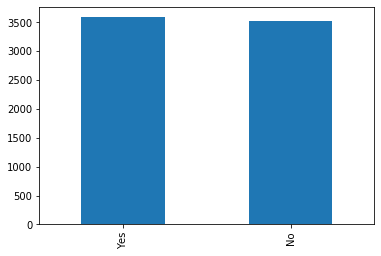

In [41]:
df['PARK_FACIL'].replace({'Noo': 'No'}, inplace = True)
df['PARK_FACIL'].value_counts().plot(kind = 'bar')

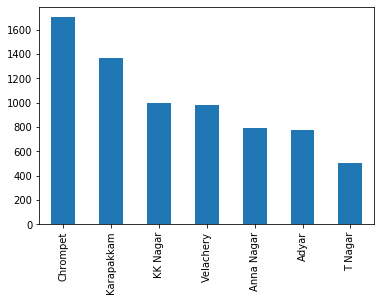

In [42]:
df['AREA'].replace({'TNagar':'T Nagar', 'Adyr': 'Adyar', 'KKNagar': 'KK Nagar',  
                    'Chrompt': 'Chrompet', 'Chormpet': 'Chrompet', 'Chrmpet': 'Chrompet',
                    'Ana Nagar': 'Anna Nagar', 'Ann Nagar': 'Anna Nagar',
                    'Karapakam': 'Karapakkam' , 'Velchery': 'Velachery'}, inplace = True)
df['AREA'].value_counts().plot(kind = 'bar')

In [43]:
df['SALE_COND'].replace({'PartiaLl':'Partial', 'Partiall': 'Partial', 
                         'Adj Land': 'AdjLand',  
                         'Ab Normal': 'AbNormal'}, inplace = True)
df['BUILDTYPE'].replace({'Comercial':'Commercial', 'Other': 'Others'}, inplace = True)
df['UTILITY_AVAIL'].replace({'All Pub':'AllPub'}, inplace = True)
df['STREET'].replace({'NoAccess':'No Access', 'Pavd':'Paved'}, inplace = True)

# Bivariate Analysis

In [44]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'COMMIS', 'SALES_PRICE'],
      dtype='object')

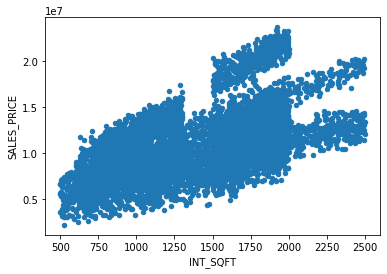

In [45]:
#interior area and sales price

df.plot.scatter('INT_SQFT', 'SALES_PRICE')

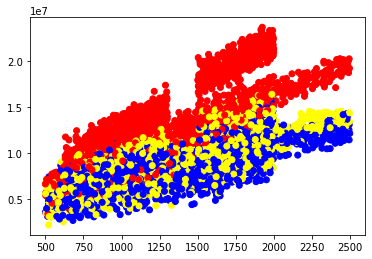

In [46]:
fig, ax = plt.subplots()
colors = {'Commercial':'red', 'House':'blue', 'Others':'yellow'}
ax.scatter(df['INT_SQFT'], df['SALES_PRICE'], c = df['BUILDTYPE'].apply(lambda x: colors[x]))
plt.show()

In [47]:
df.pivot_table(values = 'SALES_PRICE', index = 'N_BEDROOM', columns = 'N_BATHROOM', aggfunc = 'median')

N_BATHROOM,1,2
N_BEDROOM,,
1,9168740.0,9747670.0
2,12129780.0,9125250.0
3,NaN,11663490.0
4,NaN,13172000.0


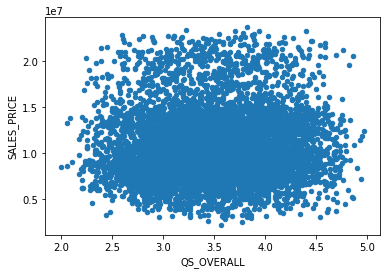

In [48]:
df.plot.scatter('QS_OVERALL', 'SALES_PRICE')

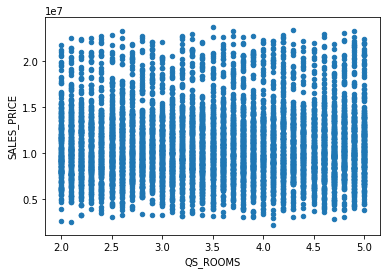

In [49]:
df.plot.scatter('QS_ROOMS', 'SALES_PRICE')

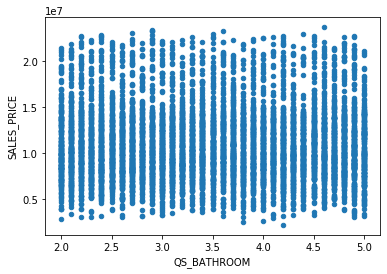

In [50]:
df.plot.scatter('QS_BATHROOM', 'SALES_PRICE')

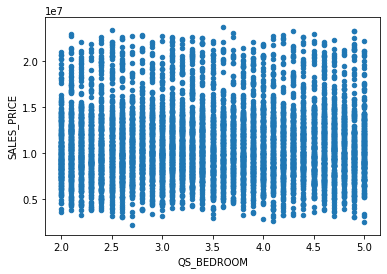

In [51]:
df.plot.scatter('QS_BEDROOM', 'SALES_PRICE')

Text(0.5, 1.0, 'QS_OVERALL')

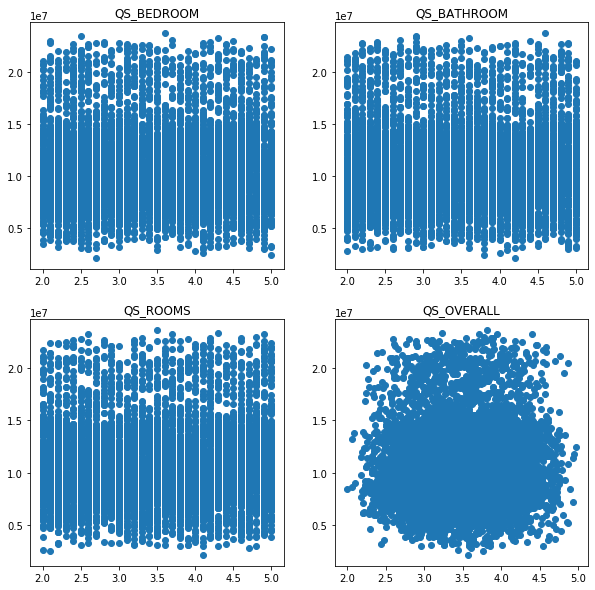

In [52]:
fig, axs = plt.subplots(2, 2)

fig.set_figheight(10)
fig.set_figwidth(10)

axs[0, 0].scatter(df['QS_BEDROOM'], df['SALES_PRICE'])
axs[0, 0].set_title('QS_BEDROOM')

axs[0, 1].scatter(df['QS_BATHROOM'], df['SALES_PRICE'])
axs[0, 1].set_title('QS_BATHROOM')

axs[1, 0].scatter(df['QS_ROOMS'], df['SALES_PRICE'])
axs[1, 0].set_title('QS_ROOMS')

axs[1, 1].scatter(df['QS_OVERALL'], df['SALES_PRICE'])
axs[1, 1].set_title('QS_OVERALL')

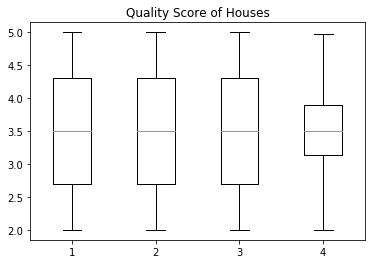

In [53]:
#Box Plot

ax = plt.figure().add_subplot(111)
ax.set_title('Quality Score of Houses')
bp = ax.boxplot([df['QS_BEDROOM'], df['QS_ROOMS'], df['QS_BATHROOM'], df['QS_OVERALL']])


In [54]:
df.groupby('BUILDTYPE').SALES_PRICE.median()

BUILDTYPE
Commercial    13356200
House          8985370
Others         9637260
Name: SALES_PRICE, dtype: int64

In [55]:
df.groupby(['BUILDTYPE', 'PARK_FACIL']).SALES_PRICE.median()

BUILDTYPE   PARK_FACIL
Commercial  No            12692985
            Yes           13920600
House       No             8514140
            Yes            9468150
Others      No             9104645
            Yes           10039405
Name: SALES_PRICE, dtype: int64

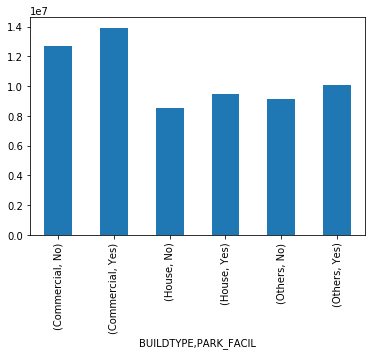

In [56]:
temp = df.groupby(['BUILDTYPE', 'PARK_FACIL']).SALES_PRICE.median()
temp.plot(kind = 'bar', stacked = True)

In [57]:
df.pivot_table(values = 'SALES_PRICE', index = 'AREA', aggfunc = 'median')

,SALES_PRICE
AREA,
Adyar,8878350
Anna Nagar,13727895
Chrompet,9606725
KK Nagar,12146740
Karapakkam,7043125
T Nagar,14049650
Velachery,10494410


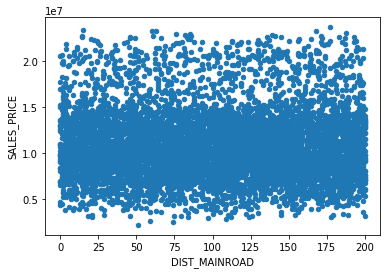

In [58]:
df.plot.scatter('DIST_MAINROAD', 'SALES_PRICE')

In [59]:
df.groupby(['STREET']).SALES_PRICE.median()

STREET
Gravel       10847225
No Access     9406050
Paved        10470070
Name: SALES_PRICE, dtype: int64

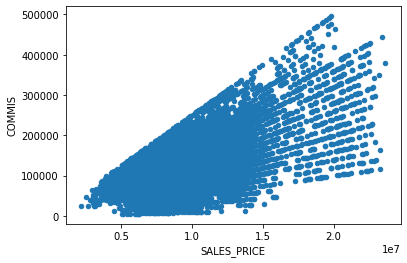

In [60]:
df.plot.scatter('SALES_PRICE', 'COMMIS')

In [61]:
df[['SALES_PRICE', 'COMMIS']].corr()

,SALES_PRICE,COMMIS
SALES_PRICE,1.000000,0.626275
COMMIS,0.626275,1.000000


# Benchmark Model

### Creating Train-Test Data Set

In [62]:
from sklearn.utils import shuffle
df = shuffle(df, random_state = 42)
div = int(df.shape[0]/4)
train = df.loc[:3 * div + 1,:]
test = df.loc[3 * div + 1:]

In [63]:
train.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
457,P02331,KK Nagar,2340,129,4,2,6,AdjLand,Yes,Others,NoSeWa,Paved,RH,3.7,3.0,4.6,3.85,284860,12948200
1876,P02591,Karapakkam,1344,151,2,2,4,AbNormal,Yes,House,NoSeWa,Gravel,I,3.4,4.1,3.2,3.53,173069,7524750
6307,P06195,KK Nagar,1900,87,3,2,5,Partial,Yes,Commercial,NoSewr,Paved,RM,2.7,4.0,2.2,2.89,394428,16434500
3182,P02695,Karapakkam,1504,129,2,2,4,AdjLand,No,House,NoSewr,Gravel,C,4.3,2.1,2.4,2.88,154232,6705750
1188,P06266,Velachery,1910,28,3,2,5,AdjLand,No,Commercial,NoSewr,Gravel,I,2.1,4.6,3.3,3.59,284968,15831550


In [64]:
test.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
5332,P00636,Chrompet,742,7,1,1,2,AbNormal,No,Others,NoSeWa,No Access,RH,5.0,3.9,3.2,4.020,29629,5925790
5477,P00910,Anna Nagar,1785,162,1,1,4,AbNormal,Yes,Others,NoSeWa,Gravel,RL,2.2,4.3,3.3,3.165,239309,14956820
2978,P09946,Velachery,1548,111,2,1,4,AdjLand,Yes,Others,ELO,No Access,RL,4.7,2.6,3.4,3.370,97746,9774610
5627,P02886,Adyar,829,144,1,1,3,AdjLand,Yes,Others,ELO,No Access,RL,4.5,3.6,4.2,4.170,52281,8713470
5460,P05836,KK Nagar,1333,78,2,1,4,AdjLand,Yes,House,NoSeWa,Gravel,RM,4.2,3.1,3.1,3.430,256984,10707680


In [65]:
test['simple_mean'] = train['SALES_PRICE'].mean()

In [66]:
from sklearn.metrics import mean_absolute_error as MAE
simple_mean_error = MAE(test['SALES_PRICE'], test['simple_mean'])
simple_mean_error

3036202.666080871

# KNN Model

In [67]:
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
457,P02331,KK Nagar,2340,129,4,2,6,AdjLand,Yes,Others,NoSeWa,Paved,RH,3.7,3.0,4.6,3.85,284860,12948200
1876,P02591,Karapakkam,1344,151,2,2,4,AbNormal,Yes,House,NoSeWa,Gravel,I,3.4,4.1,3.2,3.53,173069,7524750
6307,P06195,KK Nagar,1900,87,3,2,5,Partial,Yes,Commercial,NoSewr,Paved,RM,2.7,4.0,2.2,2.89,394428,16434500
3182,P02695,Karapakkam,1504,129,2,2,4,AdjLand,No,House,NoSewr,Gravel,C,4.3,2.1,2.4,2.88,154232,6705750
1188,P06266,Velachery,1910,28,3,2,5,AdjLand,No,Commercial,NoSewr,Gravel,I,2.1,4.6,3.3,3.59,284968,15831550


### Preparing the Data

In [68]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM         object
N_BATHROOM        object
N_ROOM            object
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [69]:
df = pd.get_dummies(df.drop(['PRT_ID'], axis = 1))
df.shape
df.head()

,INT_SQFT,DIST_MAINROAD,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE,AREA_Adyar,AREA_Anna Nagar,...,UTILITY_AVAIL_NoSewr,STREET_Gravel,STREET_No Access,STREET_Paved,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
457,2340,129,3.7,3.0,4.6,3.85,284860,12948200,0,0,...,0,0,0,1,0,0,0,1,0,0
1876,1344,151,3.4,4.1,3.2,3.53,173069,7524750,0,0,...,0,1,0,0,0,0,1,0,0,0
6307,1900,87,2.7,4.0,2.2,2.89,394428,16434500,0,0,...,1,0,0,1,0,0,0,0,0,1
3182,1504,129,4.3,2.1,2.4,2.88,154232,6705750,0,0,...,1,1,0,0,0,1,0,0,0,0
1188,1910,28,2.1,4.6,3.3,3.59,284968,15831550,0,0,...,1,1,0,0,0,0,1,0,0,0


### Segregating Dependent and Independent Variables

In [70]:
x = df.drop(['SALES_PRICE'], axis = 1)
y = df['SALES_PRICE']
x.shape, y.shape

((7109, 48), (7109,))

### Scaling the Data

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x = pd.DataFrame(x_scaled)

### Train-Test Spilt

In [75]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 56)

### Applying the Model

In [77]:
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

In [78]:
reg = KNN(n_neighbors = 5)

reg.fit(train_x, train_y)

test_predict = reg.predict(test_x)
k = mse(test_predict, test_y)
print('MSE = ', k)

MSE =  1333421134614.3735


### Finding the Appropriate k Value

In [79]:
def Elbow(K):
    test_mse = []
    for i in K:
        reg = KNN(n_neighbors = i)
        reg.fit(train_x, train_y)
        tmp = reg.predict(test_x)
        tmp = mse(tmp, test_y)
        test_mse.append(tmp)
    return test_mse

In [80]:
k = range(1, 40)
test = Elbow(k)

Text(0.5, 1.0, 'ELBOW CURVE')

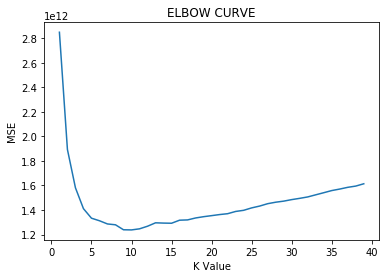

In [81]:
plt.plot(k, test)
plt.xlabel('K Value')
plt.ylabel('MSE')
plt.title('ELBOW CURVE')

In [82]:
reg = KNN(n_neighbors = 9)

reg.fit(train_x, train_y)

test_predict = reg.predict(test_x)
k = mse(test_predict, test_y)
print("MSE = ", k)

MSE =  1239043433729.0576


# Linear Regression

In [83]:
df.head()

,INT_SQFT,DIST_MAINROAD,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE,AREA_Adyar,AREA_Anna Nagar,...,UTILITY_AVAIL_NoSewr,STREET_Gravel,STREET_No Access,STREET_Paved,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
457,2340,129,3.7,3.0,4.6,3.85,284860,12948200,0,0,...,0,0,0,1,0,0,0,1,0,0
1876,1344,151,3.4,4.1,3.2,3.53,173069,7524750,0,0,...,0,1,0,0,0,0,1,0,0,0
6307,1900,87,2.7,4.0,2.2,2.89,394428,16434500,0,0,...,1,0,0,1,0,0,0,0,0,1
3182,1504,129,4.3,2.1,2.4,2.88,154232,6705750,0,0,...,1,1,0,0,0,1,0,0,0,0
1188,1910,28,2.1,4.6,3.3,3.59,284968,15831550,0,0,...,1,1,0,0,0,0,1,0,0,0


### Implementing Linear Regression

In [84]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [85]:
lr = LR()
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
#Predicting over Train Dataset
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Train MAE = ', k)

Train MAE =  593267.7703249194


In [88]:
#Predicting over Test Dataset
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test MAE = ', k)

Test MAE =  603738.7170558429


### Plotting the Coefficients

Text(0.5, 1.0, 'Coefficient Plot')

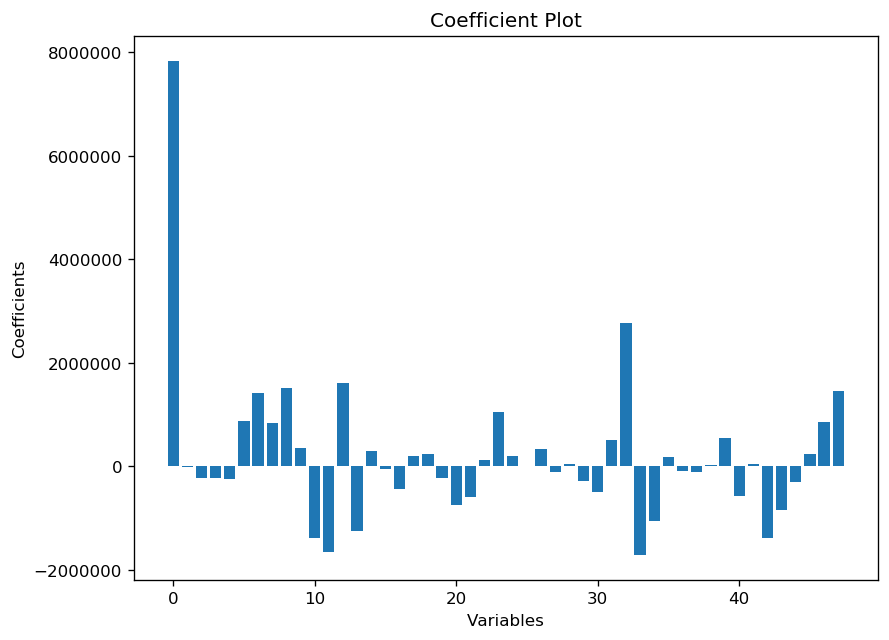

In [89]:
plt.figure(figsize = (8, 6), dpi = 120, facecolor = 'w', edgecolor = 'b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar(x, y)
plt.xlabel("Variables")
plt.ylabel("Coefficients")
plt.title("Coefficient Plot")

### Checking Assumptions of Linear Model

In [90]:
residuals = pd.DataFrame({
    'fitted values' : test_y,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
4504,13003330,1.483971e+07,-1.836384e+06
1808,17538420,1.621876e+07,1.319657e+06
5094,8195890,8.510721e+06,-3.148308e+05
4663,11514600,1.108297e+07,4.316274e+05
217,9105350,9.652599e+06,-5.472490e+05
